# Funciones de distribucion de probabilidades [Clase 45] 

![freceuncia-PDF-CDF](../Recursos/imgs/freceuncia-PDF-CDF.PNG)

**PDF**: Probability Density Function o Funcion de distribucion de probabilidad, es la curva en negro como en forma de campana. Se refiere a la probabilidad de que un valor X tome exacatemente un valor x. De hecho esta probabilidad es muy baja

**CDF**: O funcion de distribucion acumulada. Se refiere a la probabilidad de que una variable aleatoria tome ese valor x o valores menores que x.
> es la zona pintada de azul

**Curiosidad**
> de todos los tipos de distribuciones que existen las mas comunes son: *curva normal o campana de Gauss*, *distribucion uniforme*, *Distribucion de poision*, *la normal*, *multinomial* entre otras


#### **Hay dos distribuciones que necesitas conocer SI O SI**
> 1. Distribucion uniforme
> 2. Distribucion Normal o campana de Gauss

## La Distribucion uniforme

Se define con su punto de origen y su punto final (sus extremos)

![distribucion uniforme](../Recursos/imgs/distri-uniforme.PNG)

En la grafica tenemos los extremos a y b. **La probabilidad de elegir numero entre a y b es la misma**. 
> cada vez que tengas una distribucion uniforme **debes especificar entre que rango de valores a y b**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = 1
b= 100
n= 1000000 #datos entre el rango a y b, 200 es muy poco para un rango tran grande entre 100 y 200 aleatorios.
data = np.random.uniform(a,b,n)#limite inferior, superior y datos deseados. 

(array([ 99347.,  99698., 100136., 100312., 100051., 100189., 100177.,
        100378., 100053.,  99659.]),
 array([ 1.00028694, 10.90025632, 20.8002257 , 30.70019507, 40.60016445,
        50.50013383, 60.40010321, 70.30007258, 80.20004196, 90.10001134,
        99.99998071]),
 <a list of 10 Patch objects>)

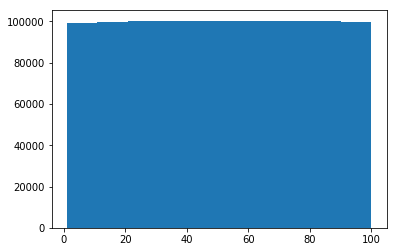

In [3]:
%matplotlib inline
plt.hist(data)

El grafico muestra una distribucion uniforme. Es decir que todos los datos tienen la misma probabilidad de salir. **Se han generado un millon de datos entre el rango de 1 a 200**

## La Distribucion Normal o campana de Gauss
![distribucion normal](../Recursos/imgs/distrinormal.PNG)

Este es el tipo de distribución más comun, lo podemos ver con las notas de un examen de fisica. La mayoria saca mala nota y muy pocos buena nota.
Los valores que definen una distribucion normal son:

**La media** Valor central. Promedio. En el grafico *este valor es de 0*

**Desviacion tipica** en el grafico este valor es de *1*

Para generar datos con distribucion normal en python usamos *(atención a las siguietnes lineas)*:

In [4]:
data = np.random.randn(1000000)

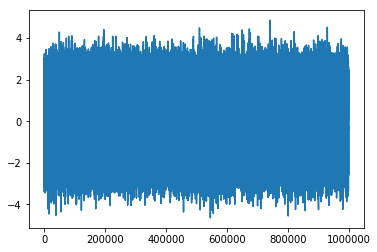

In [5]:
x = range(1,1000001)
plt.plot(x,data) #pinto grafico de los datos generados

(array([1.11000e+02, 2.80300e+03, 3.32690e+04, 1.62447e+05, 3.41829e+05,
        3.13131e+05, 1.23695e+05, 2.11250e+04, 1.54000e+03, 5.00000e+01]),
 array([-4.64927341, -3.69908009, -2.74888678, -1.79869347, -0.84850015,
         0.10169316,  1.05188647,  2.00207979,  2.9522731 ,  3.90246642,
         4.85265973]),
 <a list of 10 Patch objects>)

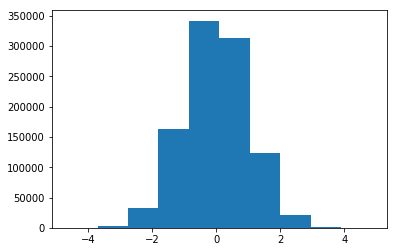

In [6]:
%matplotlib inline
plt.hist(data)

Ahora ya parece una campana en nuestro histograma

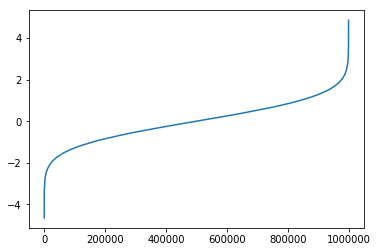

In [7]:
plt.plot(x, sorted(data)) #generamos un grafico de funcion de distribucion acumulada

Una distribucion normal se ve asi en su distribucion acumulada, la anterior es una manera de distinguirla de otro tipo de distribución

**Y si queremos otros datos de la media (mu), desviacion estandar(sd)?** veamos:

(array([1.100e+01, 1.660e+02, 7.830e+02, 2.101e+03, 3.055e+03, 2.493e+03,
        1.105e+03, 2.540e+02, 2.900e+01, 3.000e+00]),
 array([-3.76215817, -1.75873977,  0.24467863,  2.24809703,  4.25151543,
         6.25493383,  8.25835223, 10.26177063, 12.26518903, 14.26860743,
        16.27202582]),
 <a list of 10 Patch objects>)

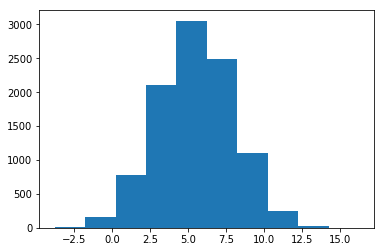

In [8]:
mu = 5.5
sd = 2.5
Z = np.random.randn(10000)
data = mu + sd* Z# Z = (X-mu) / sd -> N(0,1), X= mu + sd * z === teorema central del limite o "tipificar"
plt.hist(data)

El siguiente codigo es utilizado para generar dataset aleatorios

In [9]:
data = np.random.randn(2,4) #genera dos columnas de 4 filas
data

array([[-0.36533289, -0.00842249,  0.46383059, -0.08031852],
       [-0.33078351, -0.03859335, -0.27532792,  0.52779228]])

## La simulación de montecarlo (Para encontrar el valor de Pi)

![formula-pi](../Recursos/imgs/pi-montecarlo.PNG)

**Que vamos a hacer?**
* Generaremos dos numeros aleatorios uniformes entre 0 y 1. Estos seran x,y 1000 veces en total
* Calcularemos x^2 + y^2
    * Si el valor es menor que 1 -> estamos dentro del circulo
    * Si el valor es mayor que 1 -> estamos fuera del circulo
* Calculamos el numero total de veces que estan dentro del circulo y lo dividimos entre el nuemro total de intentos para obener una aproximación de la probabilidad de caer dentro del circulo
* Usamos esa probabilidad para aproximar el valor de π
* Repetimos el experimento el numero suficiente de veces (mas o menos 200) para obtener diferentes aproximaciones de π
* Calculamos promedio de los 1000 valores para dar valor final a π

In [11]:
def pi_montecarlo(n, n_exp):   # n = valor de datos a generar ; n_exp = veces que repito el experimento
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value= 0
        x = np.random.uniform(0,1,n).tolist()#valores de 0 a 1. n datos (n=1000)
        y = np.random.uniform(0,1,n).tolist()
        
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z <= 1:
                value += 1
        float_value = float(value)
        pi_value = float_value* 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value
    
    pi = pi_avg/n_exp
    
    print(pi)
    fig = plt.plot(pi_value_list)
    
    return(pi,fig)

3.141699999999999


(3.141699999999999, [<matplotlib.lines.Line2D at 0x1696d40b9b0>])

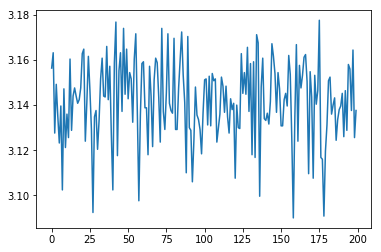

In [16]:
pi_montecarlo(10000,200)